<a href="https://colab.research.google.com/github/paulosrl/AnaliseGrafos/blob/main/Analise_Redes_Exemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de rede usando Networkx

# Grau médio / Coeficiente de clustering / Densidade do grafo / Matriz de adjacência

Grau médio: 2.0
Média do coeficiente de clustering: 0.0
Densidade do grafo (%): 22.22222222222222
Grau do nó 3: 2
Coeficiente de clustering do nó 3: 0


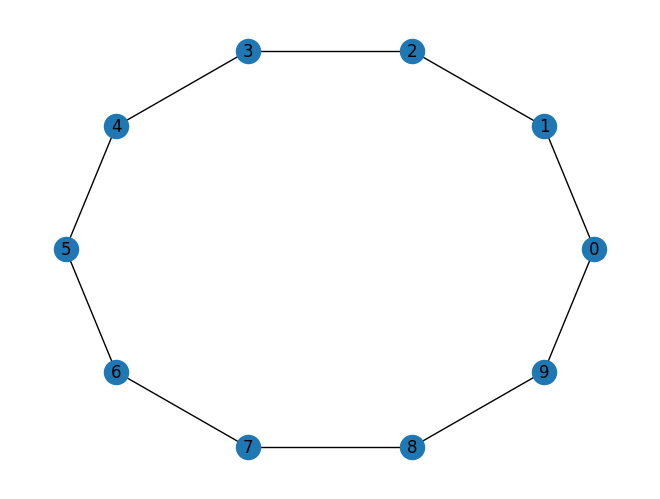

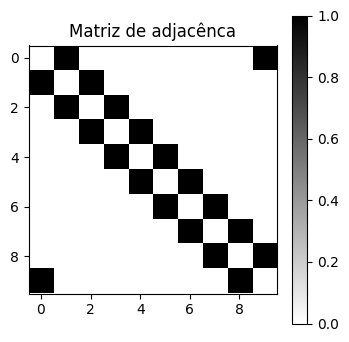

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# G1 é o grafo gerado (conectado) de forma aleatória usando o algoritmo (modelo) watts_strogatz
# O modelo de Watts-Strogatz é um modelo aleatório de geração de grafos que produz grafos
# com propriedades de pequeno mundo, incluindo comprimentos de trajeto médios curtos e alta
# clustering. Proposto por Duncan J. Watts e Steven Strogatz no seu artigo em
# Nature Joint 1998. O modelo também ficou conhecido como o (Watts) modelo beta depois
# Watts usado β para formulá-la no seu livro de ciência popular Six Degrees.
# Referência: https://pt.wikipedia.org/wiki/Modelo_de_Watts_e_Strogatz
#Documentação:
#https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.graphviz_layout.html


# criação do modelo de rede (watts_strogatz) G1
# Parâmetros:
# no de vertices da rede: 10
# quantos nós cada nó se conecta ao ser inserido na rede: 3
# probabilidade de conexão: 0.5 (quanto maior mais conexões entre nós)
# semente inicial de aleatoriedade: tries=1000, seed=random.seed(0)

G1 = nx.connected_watts_strogatz_graph(10, 3, 0.5, tries=1000, seed=random.seed(0))
#G1 = nx.connected_watts_strogatz_graph(10, 3, 0, tries=1000, seed=random.seed(0))

# Plotar o grafo
nx.draw(G1,with_labels=True,pos=nx.circular_layout(G1))

# Cálculo do grau de todos os elementos da rede e armazena em dicionário
degree_dict = dict(G1.degree())

# grau médio
# Média dos graus = soma de graus do vetor / tamanho do vetor (itens do vetor)
grau_medio = sum(degree_dict.values()) / len(degree_dict)

# Cálculo do coeficiente de clustering (coeficiente de agrupamento)
clustering_coefficient = nx.clustering(G1)

# Média do coeficiente de clustering = soma dos valores do coef. de clustering do vetor /  tamanho do vetor (itens do vetor)
average_clustering_coefficient = sum(clustering_coefficient.values()) / len(clustering_coefficient)

# Cálculo da densidade do grafo

# num. de nós
nos = len(G1.nodes())
# num de vértices/arestas
aresta = len(G1.edges())

# Calcula a densidade do gráfico
densidade = 100 *2 * aresta / (nos * (nos - 1))

# resultados
print("MÉDIA DE GRAU:", grau_medio)
print("Ceficiente Médio de Clustering:", average_clustering_coefficient)
print("Densidade do grafo (%):", densidade)

# nó de interesse
no_interesse = 3

# cálculo do grau de um nó específico
grau = G1.degree(no_interesse)

# cálculo do coeficiente de clustering de um nó específico
clustering = nx.clustering(G1, no_interesse)

print(f"Grau do nó {no_interesse}: {grau}")
print(f"Coeficiente de clustering do nó {no_interesse}: {clustering}")

# Cálculo da matriz de adjacência
adj_matrix = nx.to_numpy_array(G1)

# Plotar a matriz de adjacência
plt.figure(figsize=(4,4))
plt.imshow(adj_matrix, cmap='binary', interpolation='none')
plt.title("Matriz de adjacênca")
plt.colorbar()
plt.show()

# Caracterização (densidade, clustering, número de vértices a arestas)

Menor caminho médio: 11.838181818181818


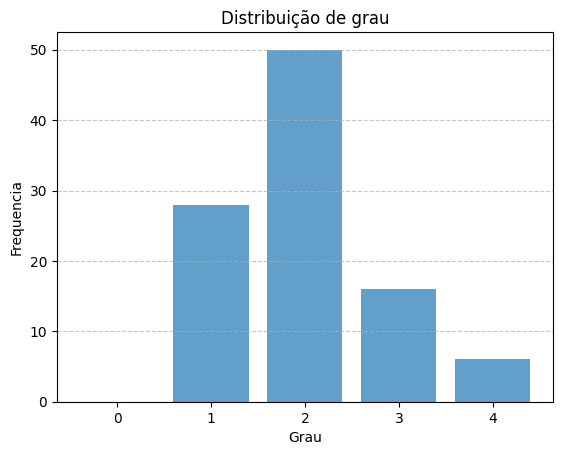

O grafico randomico é desconectado. Considere gerar um grafo randomico conectado.


In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# exemplo de rede DESCONECTADA
G1 = nx.connected_watts_strogatz_graph(100, 3, 0.5, tries=1000, seed=random.seed(0))

# exemplo de rede CONECTADA
#G1 = nx.connected_watts_strogatz_graph(100, 4, 1, tries=1000, seed=random.seed(0))

# Calcula o comprimento médio do caminho mais curto
# quanto mais conexões entre os elementos, menor o caminho médio.
menor_caminho_medio = nx.average_shortest_path_length(G1)

print("Menor caminho médio:", menor_caminho_medio)

# Calculo da distribuição de grau
distribuicao_grau = [d for n, d in G1.degree()]

# Plotar a distribução de grau
plt.hist(distribuicao_grau, bins=range(max(distribuicao_grau) + 2), align='left', alpha=0.7, rwidth=0.8)
plt.xlabel('Grau')
plt.ylabel('Frequencia')
plt.title('Distribuição de grau')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Para determinar se uma rede é uma rede de “mundo pequeno”, você pode calcular seu coeficiente médio de agrupamento
#e compará-lo com o coeficiente de agrupamento de uma rede aleatória com o mesmo número de nós e arestas.
#Uma rede de pequeno mundo normalmente tem um alto coeficiente de agrupamento como uma rede regular e um comprimento médio de caminho curto como uma rede aleatória.
#Verifique se o gráfico está conectado

# Verifica se o grafo está conectado (rede pequeno mundo)

if not nx.is_connected(G1):
    print("O grafo está desconectado. Considere trabalhar com um subgrafo conectado")
else:
    # Calcula o coeficiente de agrupamento da rede real
    C_real = nx.average_clustering(G1)

    # Calcula o comprimento médio do caminho mais curto da rede atual
    L_real = nx.average_shortest_path_length(G1)

    # Cria um grafo aleatório equivalente
    N = len(G1.nodes())
    # k médio
    k_avg = sum(dict(G1.degree()).values()) / N

    random_graph = nx.random_graphs.erdos_renyi_graph(N, k_avg / (N - 1))

    # Verifique se o grafo aleatório está conectado (opcional)
    if not nx.is_connected(random_graph):
        print("O grafico randomico é desconectado. Considere gerar um grafo randomico conectado.")
    else:
        # Calcula o coeficiente de agrupamento do gráfico aleatório
        C_random = nx.average_clustering(random_graph)

        # Calcula o comprimento médio do caminho mais curto do gráfico aleatório
        L_random = nx.average_shortest_path_length(random_graph)

        # Calcule o coeficiente de pequeno mundo (sigma)
        sigma = (C_real / C_random) / (L_real / L_random)

        # Compare o sigma com um limite (por exemplo, 1,0) para determinar se é uma rede de pequeno mundo
        if sigma > 1.0:
            print("A rede tem propriedades de uma rede pequeno mundo")
        else:
            print("A rede não tem propriedades de uma rede pequeno mundo")

# Redes Pequeno mundo

In [ ]:
import networkx as nx
import math

# Criando uma grafo manualmente
# G1 = nx.Graph()
# conexões da rede

# não pequeno mundo
#G1.add_edges_from([(1, 2), (2,3), (3,4), (2,5),(3,4),(4,5),(7,8),(8,9),(10,11),(10,12),(6,5),(6,10),(6,8),(2,4)])

#pequeno mundo
G1 = nx.connected_watts_strogatz_graph(100, 4, 1, tries=10000, seed=random.seed(0))

# Calcula o número de vértices (N)
N = len(G1.nodes())

# Calcula o grau médio (<k>)
k_avg = sum(dict(G1.degree()).values()) / N

# Calcula o logaritmo de N e <k>
log_N = math.log(N)
log_k_avg = math.log(k_avg)


# Calcule a distância média
avg_distance = nx.average_shortest_path_length(G1)

sigma=log_N/log_k_avg

if avg_distance/sigma < 0.01 or avg_distance/sigma > 10:
  print("A rede não tem propriedades de uma rede pequeno mundo")
else:
  print("A rede tem propriedades de uma rede pequeno mundo")

A rede tem propriedades de uma rede pequeno mundo


#Cálculo de medidas de Centralidade

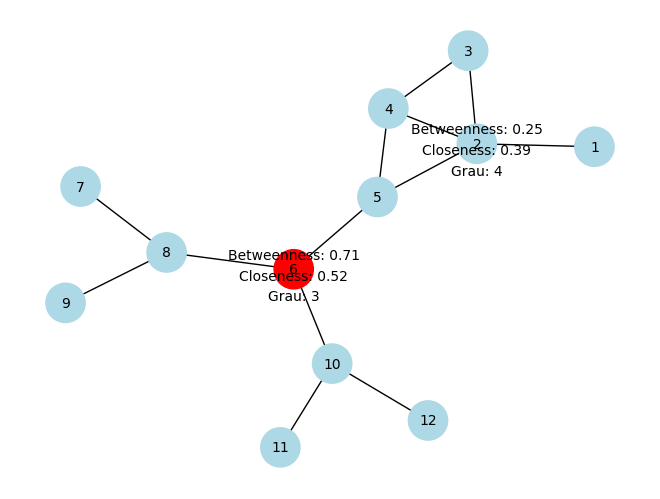

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# cria a instância de um grafo
G1 = nx.Graph()
# cria as arestas

#rede1 exemplo
#G1.add_edges_from([(1, 2), (2,3), (3,4), (4,5),(5,6),(6,1),(6,3),(5,2),(1,4)])

#rede2 exemplo
#G1.add_edges_from([(1, 2), (1,3), (1,4), (1,5),(1,6)])

#rede3 exemplo
#G1.add_edges_from([(1, 2), (2,3), (3,4), (2,5),(3,4),(4,5),(7,8),(8,9),(10,11),(10,12),(6,5),(6,10),(6,8),(2,4)])

#rede4 exemplo
G1.add_edges_from([(1, 2), (2,3), (3,4), (2,5),(3,4),(4,5),(7,8),(8,9),(10,11),(10,12),(6,5),(6,10),(6,8),(2,4)])

# Node for which we want to calculate centrality measures
# Nó a ser analisado
noAnalise1 = 6
noAnalise2 = 2

# Os cálculo são feitos primeiro em cima do grafo, depois em cima de um nó específico


# Cálculo da centralidade de intermediação (Betweenness Centrality) / capital social
betweenness_centrality = nx.betweenness_centrality(G1)
# centralidade de intermediação do nó que será analisado
betweenness_value1 = betweenness_centrality[noAnalise1]
betweenness_value2 = betweenness_centrality[noAnalise2]

# Cálculo da centralidade de proximidade (Closeness Centrality)
closeness_centrality = nx.closeness_centrality(G1)
# para o nó
closeness_value1 = closeness_centrality[noAnalise1]
closeness_value2 = closeness_centrality[noAnalise2]

# Centralidade de grau (Degree Centrality)
grau1 = len(list(G1.neighbors(noAnalise1)))
grau2 = len(list(G1.neighbors(noAnalise2)))

# layout escolhido para exibir
#Documentação:
#https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.graphviz_layout.html

#layout = nx.spring_layout(G1)
#layout = nx.circular_layout(G1)
layout = nx.kamada_kawai_layout(G1)

# vetor para armazenar as cores, o nó analisado ficará na cor vermelha
cor_nos = ['lightblue' if node != noAnalise1 else 'red' for node in G1.nodes()]

# Draw the graph
nx.draw(G1, layout, with_labels=True, node_color=cor_nos, node_size=800, font_size=10)

# Add labels for centrality measures
plt.text(layout[noAnalise1][0], layout[noAnalise1][1] + 0.05, f'Betweenness: {betweenness_value1:.2f}', fontsize=10, ha='center')
plt.text(layout[noAnalise1][0], layout[noAnalise1][1] - 0.05, f'Closeness: {closeness_value1:.2f}', fontsize=10, ha='center')
plt.text(layout[noAnalise1][0], layout[noAnalise1][1] - 0.15, f'Grau: {grau1}', fontsize=10, ha='center')
plt.text(layout[noAnalise2][0], layout[noAnalise2][1] + 0.05, f'Betweenness: {betweenness_value2:.2f}', fontsize=10, ha='center')
plt.text(layout[noAnalise2][0], layout[noAnalise2][1] - 0.05, f'Closeness: {closeness_value2:.2f}', fontsize=10, ha='center')
plt.text(layout[noAnalise2][0], layout[noAnalise2][1] - 0.15, f'Grau: {grau2}', fontsize=10, ha='center')
# Show the plot
plt.show()

# Modularidade

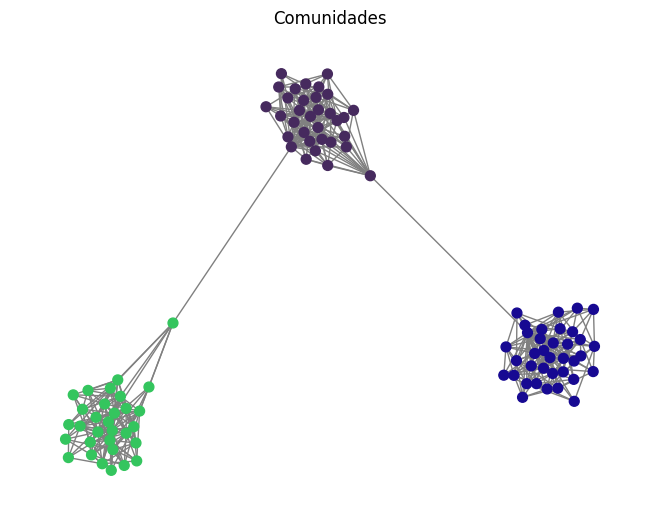

Modularity: 0.6622


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Generate a modular graph with specified parameters, increased min_community, and min_degree
n = 100  # Total number of nodes
tau1 = 3.0  # Power law exponent for the degree distribution of the first community
tau2 = 2.0  # Power law exponent for the degree distribution of the second community
mu = 0.02  # Fraction of intra-community edges

# Create a dict to specify parameters
params = {
    'n': n,
    'tau1': tau1,
    'tau2': tau2,
    'mu': mu,
    'min_community': 30,  # Increased minimum size of a community
    'min_degree': 5,      # Minimum degree of nodes in the graph
    'seed': 10 # aleatorio (manter)
}

# algoritmo para otimização / criação de comunidades virtuais
G = nx.LFR_benchmark_graph(**params)

# Remove self-loops (não interessa nesta análise)
self_loops = list(nx.selfloop_edges(G))
G.remove_edges_from(self_loops)

# Calculate modularity using the Louvain algorithm
partition = nx.community.label_propagation_communities(G)
modularity_value = nx.community.quality.modularity(G, partition)

# Create a color map for communities
community_colors = {}
for i, community in enumerate(partition):
    color = (random.random(), random.random(), random.random())  # Generate a random color for each community
    for node in community:
        community_colors[node] = color

# Plot the modular graph with community-specific colors
node_colors = [community_colors[node] for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)  # Layout the graph using a seed for reproducibility
nx.draw(G, pos, node_size=50, node_color=node_colors, edge_color='gray', with_labels=False)
plt.title("Comunidades")
plt.show()

# Print the modularity
print(f"Modularidade: {modularity_value:.4f}")


# Importar um CSV para gerar um grafo

Saving teste.csv to teste (4).csv


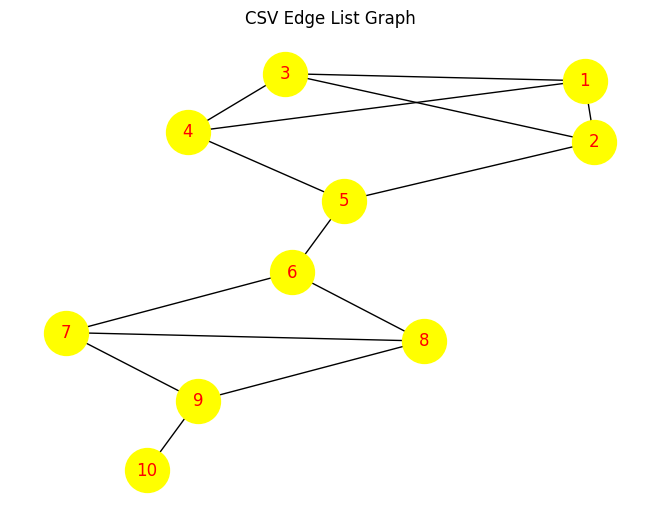

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Upload your CSV file to Google Colab
# You can upload the file manually via the Files tab or use code to upload it.

# If using code to upload the file:
from google.colab import files
uploaded = files.upload()

# Step 2: Read the CSV file into a pandas DataFrame

# Find the uploaded CSV file (assuming there's only one file)
csv_file_name = next(iter(uploaded))

# Step 2: Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_name)

# Step 3: Create a NetworkX graph from the DataFrame
# Replace 'Column1' and 'Column2' with the actual column names from your CSV
G = nx.from_pandas_edgelist(df, source='From', target='To')

# Step 4: Plot the graph
pos = nx.kamada_kawai_layout(G)  # You can use different layouts as well
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='yellow', font_size=12, font_color='red')
plt.title("CSV Edge List Graph")
plt.show()

# Metricas de Rede 1


Saving teste2.csv to teste2.csv


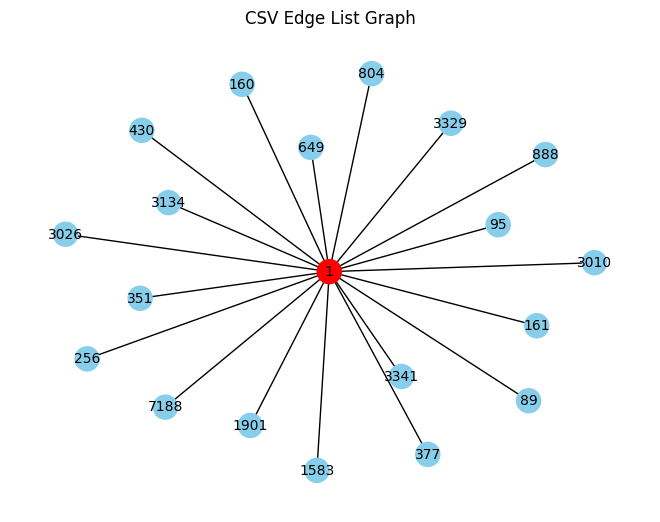

Menor caminho médio: 1.90
Grau médio: 1.90
Densidade da rede: 0.10
Coeficiente de agrupamento médio (Clustering Coefficient): 0.00
Rede pequeno mundo? False


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Upload your CSV file to Google Colab
# You can upload the file manually via the Files tab or use code to upload it.

# If using code to upload the file:
from google.colab import files
uploaded = files.upload()

# Find the uploaded CSV file (assuming there's only one file)
csv_file_name = next(iter(uploaded))

# Step 2: Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_name)


# Step 3: Create a NetworkX graph from the DataFrame
# Replace 'From' and 'To' with the actual column names from your CSV
G = nx.from_pandas_edgelist(df, source='From', target='To')

# Cálculo das Métricas da REDE
average_shortest_path_length = nx.average_shortest_path_length(G)
mean_degree = sum(dict(G.degree()).values()) / len(G)
network_density = nx.density(G)
average_clustering_coefficient = nx.average_clustering(G)

# Check for small-world properties by comparing clustering coefficient to random graphs
random_graph = nx.random_graphs.erdos_renyi_graph(len(G.nodes()), nx.density(G))
random_clustering_coefficient = nx.average_clustering(random_graph)
is_small_world = average_clustering_coefficient > random_clustering_coefficient

# Find nodes with highest centrality measures
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
highest_degree_node = max(dict(G.degree()).items(), key=lambda x: x[1])[0]
highest_betweenness_centrality_node = max(betweenness_centrality.items(), key=lambda x: x[1])[0]
highest_closeness_centrality_node = max(closeness_centrality.items(), key=lambda x: x[1])[0]

# Color the nodes
node_colors = ['red' if node == highest_betweenness_centrality_node else
               'black' if node == highest_closeness_centrality_node else
               'blue' if node == highest_degree_node else 'skyblue'
               for node in G.nodes()]

# Step 4: Plot the graph
pos = nx.spring_layout(G)  # You can use different layouts as well
nx.draw(G, pos, with_labels=True, node_size=300, node_color=node_colors, font_size=10, font_color='black')
plt.title("CSV Edge List Graph")
plt.show()

# Print calculated network metrics and small-world property
print(f"Menor caminho médio: {average_shortest_path_length:.2f}")
print(f"Grau médio: {mean_degree:.2f}")
print(f"Densidade da rede: {network_density:.2f}")
print(f"Coeficiente de agrupamento médio (Clustering Coefficient): {average_clustering_coefficient:.2f}")
print(f"Rede pequeno mundo? {is_small_world}")

# Metricas de Rede 2

Saving teste1.csv to teste1.csv


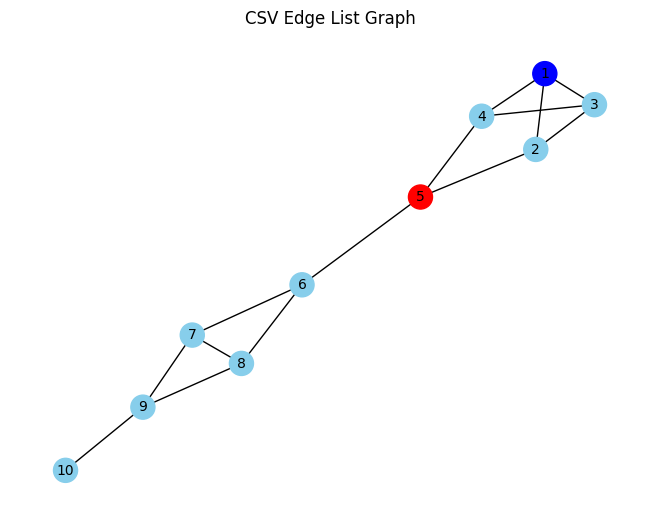

Average Shortest Path Length: 2.62
Mean Degree: 2.80
Network Density: 0.31
Average Clustering Coefficient: 0.40
Is Small World? True


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Upload your CSV file to Google Colab
# You can upload the file manually via the Files tab or use code to upload it.

# If using code to upload the file:
from google.colab import files
uploaded = files.upload()

# Find the uploaded CSV file (assuming there's only one file)
csv_file_name = next(iter(uploaded))

# Step 2: Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_name)

# Step 3: Create a NetworkX graph from the DataFrame
# Replace 'From' and 'To' with the actual column names from your CSV
G = nx.from_pandas_edgelist(df, source='From', target='To')

# Calculate network metrics
average_shortest_path_length = nx.average_shortest_path_length(G)
# Cálculo do grau médio
mean_degree = sum(dict(G.degree()).values()) / len(G)
# Cálculo da densidade
network_density = nx.density(G)
#cálculo do coef. de clustering médio
#tem a ver com o capital social e o o quanto os vizinhos de cada nó estão ou não conectados
average_clustering_coefficient = nx.average_clustering(G)

# Check for small-world properties by comparing clustering coefficient to random graphs
random_graph = nx.random_graphs.erdos_renyi_graph(len(G.nodes()), nx.density(G))
random_clustering_coefficient = nx.average_clustering(random_graph)
# verifica se é uma rede pequeno mundo
is_small_world = average_clustering_coefficient > random_clustering_coefficient

# Find nodes with highest centrality measures
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
highest_degree_node = max(dict(G.degree()).items(), key=lambda x: x[1])[0]
highest_betweenness_centrality_node = max(betweenness_centrality.items(), key=lambda x: x[1])[0]
highest_closeness_centrality_node = max(closeness_centrality.items(), key=lambda x: x[1])[0]

# Color the nodes
node_colors = ['red' if node == highest_betweenness_centrality_node else
               'black' if node == highest_closeness_centrality_node else
               'blue' if node == highest_degree_node else 'skyblue'
               for node in G.nodes()]

# Step 4: Plot the graph
pos = nx.spring_layout(G)  # You can use different layouts as well
nx.draw(G, pos, with_labels=True, node_size=300, node_color=node_colors, font_size=10, font_color='black')
plt.title("CSV Edge List Graph")
plt.show()

# Print calculated network metrics and small-world property
print(f"Average Shortest Path Length: {average_shortest_path_length:.2f}")
print(f"Mean Degree: {mean_degree:.2f}")
print(f"Network Density: {network_density:.2f}")
print(f"Average Clustering Coefficient: {average_clustering_coefficient:.2f}")
print(f"Is Small World? {is_small_world}")

# # Metricas de Rede 3

Saving teste1.csv to teste1 (1).csv


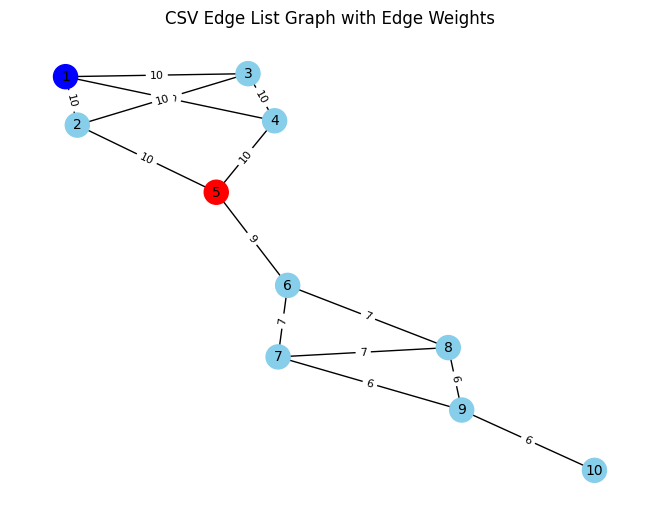

Average Shortest Path Length: 21.78
Mean Degree: 2.80
Network Density: 0.31
Average Clustering Coefficient: 0.40
Is Small World? False


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Upload your CSV file to Google Colab
# You can upload the file manually via the Files tab or use code to upload it.

# If using code to upload the file:
from google.colab import files
uploaded = files.upload()

# Find the uploaded CSV file (assuming there's only one file)
csv_file_name = next(iter(uploaded))
df = pd.read_csv(csv_file_name)

# Step 3: Create a NetworkX graph from the DataFrame with "Sign" as edge weights
# Replace 'From' and 'To' with the actual column names from your CSV
G = nx.Graph()  # Create an empty graph
#inserindo peso nas arestas
for index, row in df.iterrows():
    G.add_edge(row['From'], row['To'], Sign=row['Sign'])  # Add edges with the 'Sign' attribute

# Extract edge weights
edge_weights = [data['Sign'] for u, v, data in G.edges(data=True)]

# Calculate network metrics
average_shortest_path_length = nx.average_shortest_path_length(G, weight='Sign')
mean_degree = sum(dict(G.degree()).values()) / len(G)
network_density = nx.density(G)
average_clustering_coefficient = nx.average_clustering(G)

# Check for small-world properties by comparing clustering coefficient to random graphs
random_graph = nx.random_graphs.erdos_renyi_graph(len(G.nodes()), nx.density(G))
random_clustering_coefficient = nx.average_clustering(random_graph)
is_small_world = average_clustering_coefficient > random_clustering_coefficient

# Find nodes with highest centrality measures
betweenness_centrality = nx.betweenness_centrality(G, weight='Sign')
closeness_centrality = nx.closeness_centrality(G, distance='Sign')
highest_degree_node = max(dict(G.degree(weight='Sign')).items(), key=lambda x: x[1])[0]
highest_betweenness_centrality_node = max(betweenness_centrality.items(), key=lambda x: x[1])[0]
highest_closeness_centrality_node = max(closeness_centrality.items(), key=lambda x: x[1])[0]

# Color the nodes
node_colors = ['red' if node == highest_betweenness_centrality_node else
               'green' if node == highest_closeness_centrality_node else
               'blue' if node == highest_degree_node else 'skyblue'
               for node in G.nodes()]

# Step 4: Plot the graph with edge labels (weights)
pos = nx.spring_layout(G)  # You can use different layouts as well
nx.draw(G, pos, with_labels=True, node_size=300, node_color=node_colors, font_size=10, font_color='black')
# peso das arestas
edge_labels = {(u, v): w for (u, v, w) in G.edges(data='Sign')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("CSV Edge List Graph with Edge Weights")
plt.show()

# Print calculated network metrics and small-world property
print(f"Average Shortest Path Length: {average_shortest_path_length:.2f}")
print(f"Mean Degree: {mean_degree:.2f}")
print(f"Network Density: {network_density:.2f}")
print(f"Average Clustering Coefficient: {average_clustering_coefficient:.2f}")
print(f"Is Small World? {is_small_world}")

# Usando o chatGPT para gerar Redes
Prompts utilizados em 04/10/2023

## desenhe uma rede com 10 nós, sendo que o nó com maior intermediação seja diferente do nó com maior grau

## gere a lista de arestas em formato csv

## acrescente no arquivo, uma coluna com pesos aleatórios para cada aresta, o maior valor para o peso deve ser igual 1

## na rede gerada, qual o vértice com a maior centralidade de intermediação?

## escreve o código em python para desenhar a rede gerada identificando os nós por números

desenhe uma rede  que possua 10 nós, o nó com maior intermediação deve ser diferente do nó com maior grau.

gere a lista de arestas em formato csv

no arquivo gerado, acrescente uma coluna chamado peso. O valor do maior peso deverá igual a 1



In [ ]:
import networkx as nx

# Lista de arestas com pesos normalizados
edges = [
    (1, 2, 0.325),
    (1, 4, 0.217),
    (2, 3, 0.241),
    (2, 5, 0.441),
    (3, 6, 0.149),
    (4, 5, 0.500),
    (4, 8, 0.197),
    (5, 6, 0.377),
    (5, 9, 0.293),
    (6, 7, 0.404),
    (7, 10, 0.547),
    (8, 9, 0.182),
    (9, 10, 0.095)
]

# Criar um grafo direcionado a partir das arestas com pesos
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

# Calcular a centralidade de intermediação
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Encontrar o vértice com maior centralidade de intermediação
vertice_maior_centr_intermediação = max(betweenness_centrality, key=betweenness_centrality.get)

print("Vértice com maior centralidade de intermediação:", vertice_maior_centr_intermediação)

Vértice com maior centralidade de intermediação: 6


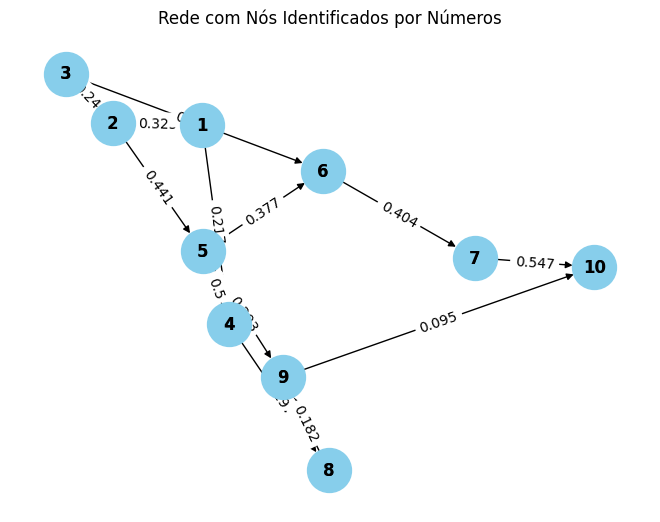

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Lista de arestas com pesos normalizados
edges = [
    (1, 2, 0.325),
    (1, 4, 0.217),
    (2, 3, 0.241),
    (2, 5, 0.441),
    (3, 6, 0.149),
    (4, 5, 0.500),
    (4, 8, 0.197),
    (5, 6, 0.377),
    (5, 9, 0.293),
    (6, 7, 0.404),
    (7, 10, 0.547),
    (8, 9, 0.182),
    (9, 10, 0.095)
]

# Criar um grafo direcionado a partir das arestas com pesos
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

# Desenhar o grafo
pos = nx.spring_layout(G, seed=42)  # Layout para posicionar os nós
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Identificar os nós por números
node_labels = {node: str(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.title("Rede com Nós Identificados por Números")
plt.axis('off')
plt.show()

In [ ]:
import networkx as nx

# Criar um grafo
G = nx.Graph()

# Adicionar arestas ao grafo
edges = [(1, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9), (4, 10)]
G.add_edges_from(edges)

# Calcular centralidade de intermediação
betweenness_centrality = nx.betweenness_centrality(G)

# Encontrar o vértice com a maior centralidade de intermediação
vertice_maior_centralidade = max(betweenness_centrality, key=betweenness_centrality.get)

print("Vértice com a maior centralidade de intermediação:", vertice_maior_centralidade)
print("Valor da centralidade de intermediação:", betweenness_centrality[vertice_maior_centralidade])

Vértice com a maior centralidade de intermediação: 1
Valor da centralidade de intermediação: 0.75
